# W207 Final Project
## Kaggle Competition: Forest Cover Prediction
**Pierce Coggins, Jake Mitchell, Debasish Mukhopadhyay, and Tim Slade**

### The Task
In this assignment, we will attempt to predict the forest cover type (defined as the predominant type of tree cover) for a given 30m x 30m area of land given a series of cartographic variables as inputs. As there are 7 types of forest cover, this is a multi-category classification problem.

### About the Data

The training data contains 15,120 observations. We will need to split these into _train_ and _dev_ subsets as we revise our models and tune our hyperparameters. An 80 / 20 split is often recommended as a rule of thumb. We thus expect to have approximately 12,000 observations in our training data.

The features in our data are as follows:
1. **Elevation** - Elevation in meters
1. **Aspect** - Aspect in degrees azimuth
1. **Slope** - Slope in degrees
1. **Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features
1. **Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features
1. **Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway
1. **Hillshade_9am** (0 to 255 index) - Hillshade index at 9am, summer solstice
1. **Hillshade_Noon** (0 to 255 index) - Hillshade index at noon, summer solstice
1. **Hillshade_3pm** (0 to 255 index) - Hillshade index at 3pm, summer solstice
1. **Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points
1. **Wilderness_Area** (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
1. **Soil_Type** (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

The label indicating our data's categorization is contained in the variable 
+ **Cover_Type** (7 types, integers 1 to 7) - Forest Cover Type designation

We have 10 simple features. The 11th and 12th - **wilderness_area** and **soil_type** - are categorical variables which are represented as binary columns in our dataset. We therefore have a total of 10 + 4 + 40 = 54 features to work with.

#### Details of the categorical variables

The wilderness areas are:
1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The soil types are:
1. _Cathedral family_ - Rock outcrop complex, extremely stony.
2. _Vanet_ - Ratake families complex, very stony.
3. _Haploborolis_ - Rock outcrop complex, rubbly.
4. _Ratake family_ - Rock outcrop complex, rubbly.
5. _Vanet family_ - Rock outcrop complex complex, rubbly.
6. _Vanet_ - Wetmore families - Rock outcrop complex, stony.
7. _Gothic family_
8. _Supervisor_ - Limber families complex.
9. _Troutville family, very stony_
10. _Bullwark_ - Catamount families - Rock outcrop complex, rubbly.
11. _Bullwark_ - Catamount families - Rock land complex, rubbly.
12. _Legault family_ - Rock land complex, stony.
13. _Catamount family_ - Rock land - Bullwark family complex, rubbly.
14. _Pachic Argiborolis_ - Aquolis complex.
15. _unspecified in the USFS Soil and ELU Survey_
16. _Cryaquolis_ - Cryoborolis complex.
17. _Gateview family_ - Cryaquolis complex.
18. _Rogert family_ - very stony.
19. _Typic Cryaquolis_ - Borohemists complex.
20. _Typic Cryaquepts_ - Typic Cryaquolls complex.
21. _Typic Cryaquolls_ - Leighcan family, till substratum complex.
22. _Leighcan family, till substratum, extremely bouldery_
23. _Leighcan family, till substratum_ - Typic Cryaquolls complex.
24. _Leighcan family, extremely stony_
25. _Leighcan family, warm, extremely stony_
26. _Granile_ - Catamount families complex, very stony.
27. _Leighcan family, warm_ - Rock outcrop complex, extremely stony.
28. _Leighcan family_ - Rock outcrop complex, extremely stony.
29. _Como_ - Legault families complex, extremely stony.
30. _Como family_ - Rock land - Legault family complex, extremely stony.
31. _Leighcan_ - Catamount families complex, extremely stony.
32. _Catamount family_ - Rock outcrop - Leighcan family complex, extremely stony.
33. _Leighcan_ - Catamount families - Rock outcrop complex, extremely stony.
34. _Cryorthents_ - Rock land complex, extremely stony.
35. _Cryumbrepts_ - Rock outcrop - Cryaquepts complex.
36. _Bross family_ - Rock land - Cryumbrepts complex, extremely stony.
37. _Rock outcrop_ - Cryumbrepts - Cryorthents complex, extremely stony.
38. _Leighcan_ - Moran families - Cryaquolls complex, extremely stony.
39. _Moran family_ - Cryorthents - Leighcan family complex, extremely stony.
40. _Moran family_ - Cryorthents - Rock land complex, extremely stony.

The training data, labels, and contextual information are drawn from [Kaggle's _Forest Cover Type Prediction_ competition](https://www.kaggle.com/c/forest-cover-type-prediction).

### Importing Libraries

In [21]:
%matplotlib inline

# General libraries
import pandas as pd
import numpy as np
import os
from scipy import stats

# Plotting and printing libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pprint

# Model-building libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

# SK-learn libraries for learning
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# SK-learn libraries for evaluation
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

#Deb

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


### Loading, Splitting, and Initial Exploring of the Data

We load the data from the source file and proceed to take a look at various basic characteristics of the dataset.
1. We expect to see all of the features discussed above represented in our column names
1. As there is no separate dataset containing the labels for our observations, we would expect to see the 'Cover_Type' variable in our data
1. We would expect to see a shape of (15120, 55) - the 54 features plus our label column

In [2]:
full_data = pd.read_csv('./train.csv')
print(f'Columns: {full_data.columns}')
print(f'Shape: {full_data.shape}')

Columns: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39

In [3]:
# Add a few features

#print(full_data['Horizontal_Distance_To_Hydrology']/(np.mean(full_data['Horizontal_Distance_To_Hydrology']) ))
#print(full_data['Horizontal_Distance_To_Roadways']/(np.mean(full_data['Horizontal_Distance_To_Roadways']) ))
#full_data.iloc[:,[4,6,36,49,51,52,53,54]]
full_data['Norm Horizontal_Distance_To_Hydrology'] = full_data['Horizontal_Distance_To_Hydrology']/(np.mean(full_data['Horizontal_Distance_To_Hydrology']) )
full_data['Norm Horizontal_Distance_To_Roadways'] = full_data['Horizontal_Distance_To_Roadways']/(np.mean(full_data['Horizontal_Distance_To_Roadways']) )

full_data['Soil1_21'] = full_data.loc[:,'Soil_Type1':'Soil_Type21'].sum(axis=1)
full_data['Soil23_34'] = full_data.loc[:,'Soil_Type23':'Soil_Type34'].sum(axis=1) 

#print(full_data.loc[:,'Soil_Type35':'Soil_Type40'] , full_data.loc[:,'Soil_Type1':'Soil_Type21'].sum(axis=1),full_data.loc[:,'Soil_Type23':'Soil_Type34'].sum(axis=1) )

#np.add(full_data.iloc[:,[53]],  full_data.iloc[:,[54]])

In [4]:
#full_data[.loc[:3,'Soil_Type40':]
full_data[full_data['Soil_Type40']>0].loc[:,'Soil_Type40':]

,Soil_Type40,Cover_Type,Norm Horizontal_Distance_To_Hydrology,Norm Horizontal_Distance_To_Roadways,Soil1_21,Soil23_34
215,1,1,2.720122,2.254929,0,0
242,1,1,2.213950,2.075818,0,0
350,1,1,2.130322,1.863452,0,0
1746,1,7,2.051095,2.218756,0,0
1781,1,7,1.980671,2.209422,0,0
1789,1,7,1.980671,2.180251,0,0
1798,1,7,2.112716,2.175000,0,0
2166,1,7,0.660224,1.475476,0,0
2187,1,7,0.933116,1.559489,0,0
2835,1,1,2.821356,2.022143,0,0


In [5]:
import statsmodels.api as sm
X = full_data.loc[:,'Elevation':'Soil_Type40']
y = full_data.loc[:,"Cover_Type"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cover_Type   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     204.4
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:10:43   Log-Likelihood:                -28021.
No. Observations:               15120   AIC:                         5.614e+04
Df Residuals:                   15069   BIC:                         5.653e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Elevation                             -0.0005      0.000     -4.647      0.000      -0.001      -0.000
Aspect                                 0.0007      0.000      4.674      0.000       0.000       0.001
Slope                                  0.0086      0.005      1.895      0.058      -0.000       0.018
Horizontal_Distance_To_Hydrology      -0.0010   9.39e-05    -11.103      0.000      -0.001      -0.001
Vertical_Distance_To_Hydrology         0.0017      0.000      5.501      0.000       0.001       0.002
Horizontal_Distance_To_Roadways       -0.0002   1.37e-05    -11.409      0.000      -0.000      -0.000
Hillshade_9am                          0.0199      0.005      4.403      0.000       0.011       0.029
Hillshade_Noon                        -0.0155      0.004     -4.139      0.000      -0.023      -0.008
Hillshade_3pm                          0.0129      0.004      3.474      0.001       0.006       0.020
Horizontal_Distance_To_Fire_Points     0.0001   1.51e-05      6.956      0.000    7.53e-05       0.000
Wilderness_Area1                       1.6735      0.728      2.299      0.022       0.247       3.100
Wilderness_Area2                       1.9421      0.738      2.631      0.009       0.495       3.389
Wilderness_Area3                       2.8779      0.730      3.942      0.000       1.447       4.309
Wilderness_Area4                       2.4194      0.720      3.360      0.001       1.008       3.831
Soil_Type1                             0.0754      0.133      0.568      0.570      -0.185       0.336
Soil_Type2                             0.1233      0.116      1.062      0.288      -0.104       0.351
Soil_Type3                            -0.3005      0.119     -2.526      0.012      -0.534      -0.067
Soil_Type4                            -0.4328      0.115     -3.774      0.000      -0.658      -0.208
Soil_Type5                             0.4476      0.157      2.860      0.004       0.141       0.754
Soil_Type6                             0.0998      0.121      0.824      0.410      -0.138       0.337
Soil_Type7                          2.952e-12   1.16e-11      0.255      0.799   -1.97e-11    2.57e-11
Soil_Type8                            -0.5434      1.513     -0.359      0.719      -3.508       2.422
Soil_Type9                            -1.1802      0.488     -2.416      0.016      -2.138      -0.223
Soil_Type10                            0.6042      0.105      5.761      0.000       0.399       0.810
Soil_Type11                           -0.0121      0.122     -0.099      0.921      -0.251       0.227
Soil_Type12                           -0.9824      0.144     -6.824      0.000      -1.265      -0.700
Soil_Type13                            0.3885      0.124      3.143      0.002       0.146      

The results are as expected. We need to remove the labels from the features before we do much else, lest we accidentally let our models peek at the data. We also want to split the training dataset into _train_ and _dev_ so we can have a better opportunity to update our models and parameters. An 80% train / 20% dev split is a relatively standard rule of thumb.

In [6]:
# Separating out the labels
full_labels = full_data['Cover_Type']
full_features = full_data.drop('Cover_Type', axis=1)
featured_features = full_data.iloc[:,[36,49,51,52,53,54,56,57,58,59]]
#df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
featured_features = full_data.iloc[:,[36,49,51,52,53,54,56,57,58,59]]
# Setting seed so we get consistent results from our splitting
np.random.seed(0)
X_train, X_dev, y_train, y_dev = train_test_split(full_features, full_labels, test_size=0.20)
#Deb
FX_train, FX_dev, Fy_train, Fy_dev = train_test_split(featured_features, full_labels, test_size=0.20)
#Deb
# Verifying our data shapes are as expected
print(f'''
Training dataset shape: {X_train.shape}
Training label shape: {y_train.shape}
Dev dataset shape: {X_dev.shape}
Dev label shape: {y_dev.shape}

#Deb
Featured Training dataset shape: {FX_train.shape}
Featured Dev dataset shape: {FX_dev.shape}
#Deb
''')


Training dataset shape: (12096, 59)
Training label shape: (12096,)
Dev dataset shape: (3024, 59)
Dev label shape: (3024,)

#Deb
Featured Training dataset shape: (12096, 10)
Featured Dev dataset shape: (3024, 10)
#Deb



We take a look at the first several observations to get a sense for the nature of the data.

In [7]:
X_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Norm Horizontal_Distance_To_Hydrology,Norm Horizontal_Distance_To_Roadways,Soil1_21,Soil23_34
7366,7367,3367,294,9,295,29,1471,196,238,182,...,0,0,0,1,0,0,1.298440,0.858215,0,0
4936,4937,2221,110,26,90,24,764,253,202,60,...,0,0,0,0,0,0,0.396134,0.445735,1,0
5777,5778,3372,265,6,30,4,4288,205,243,176,...,0,0,0,0,0,1,0.132045,2.501716,0,0
10724,10725,2555,121,10,0,0,722,237,232,125,...,0,0,0,0,0,0,0.000000,0.421231,1,0
9412,9413,3428,3,19,636,80,4160,191,200,143,...,0,0,0,0,1,0,2.799349,2.427038,0,0


We'll also want to get a high-level summary of each of our features.

In [8]:
# Small function to give us a bird's-eye summary of the data
def five_num_summary(df, column):
    print(f'Column: {column:<35} | ' +
          f'Max value: {np.max(df[column]):>6} | ' + 
          f'Min value: {np.min(df[column]):>7.2f} | ' +
          f'Mean: {np.mean(df[column]):>7.2f} | ' +
          f'Median: {np.median(df[column]):>7.2f}')

for col_name in X_train.columns:
    five_num_summary(X_train, col_name)

Column: Id                                  | Max value:  15119 | Min value:    1.00 | Mean: 7527.12 | Median: 7513.50
Column: Elevation                           | Max value:   3849 | Min value: 1863.00 | Mean: 2751.08 | Median: 2753.50
Column: Aspect                              | Max value:    360 | Min value:    0.00 | Mean:  156.78 | Median:  126.00
Column: Slope                               | Max value:     50 | Min value:    0.00 | Mean:   16.48 | Median:   15.00
Column: Horizontal_Distance_To_Hydrology    | Max value:   1318 | Min value:    0.00 | Mean:  228.63 | Median:  180.00
Column: Vertical_Distance_To_Hydrology      | Max value:    554 | Min value: -146.00 | Mean:   51.28 | Median:   33.00
Column: Horizontal_Distance_To_Roadways     | Max value:   6836 | Min value:    0.00 | Mean: 1707.33 | Median: 1310.00
Column: Hillshade_9am                       | Max value:    254 | Min value:   58.00 | Mean:  212.86 | Median:  220.00
Column: Hillshade_Noon                      | Ma

It would be useful for us to understand whether we have an imbalanced dataset (i.e., one where certain labels/categories are overrepresented relative to others.) Here we'll quickly describe our training and dev labels and just make sure our classes are balanced. We can do this both graphically and numerically.

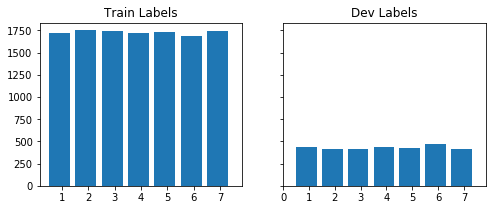

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3), sharey=True)
bins = np.arange(8) + 0.5
ax1.hist(y_train, bins, width = 0.8)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_title('Train Labels')
ax2.hist(y_dev, bins, width = 0.8)
ax2.set_title('Dev Labels')
plt.xticks(range(8))
plt.show()

In [10]:
print(stats.describe(y_train))
print(stats.describe(y_dev))
for i in range(0, 8):
        print(f'i = {i}: Train Ct: {(y_train==i).sum():>5} | Dev Ct: {(y_dev==i).sum():>5}')

DescribeResult(nobs=12096, minmax=(1, 7), mean=3.994212962962963, variance=4.000297222604995, skewness=0.009197322345263092, kurtosis=-1.2487983901931698)
DescribeResult(nobs=3024, minmax=(1, 7), mean=4.023148148148148, variance=4.000787174869213, skewness=-0.036793313212917164, kurtosis=-1.2530969031674737)
i = 0: Train Ct:     0 | Dev Ct:     0
i = 1: Train Ct:  1721 | Dev Ct:   439
i = 2: Train Ct:  1749 | Dev Ct:   411
i = 3: Train Ct:  1742 | Dev Ct:   418
i = 4: Train Ct:  1722 | Dev Ct:   438
i = 5: Train Ct:  1732 | Dev Ct:   428
i = 6: Train Ct:  1689 | Dev Ct:   471
i = 7: Train Ct:  1741 | Dev Ct:   419


It appears that our classes are quite well-balanced in both our training data and the dev data.

This is good both because we will not need to deliberately compensate for imbalances and because our model will be unable to achieve reasonable performance simply by guessing the modal category. (Doing so would give accuracy on the training set of 1741/12096 = 0.145, and then accuracy on the test set of 411/3024 = 0.136.)

### Initial transformations of the data

As we can see from the initial summaries of our data above, the scales of the features vary widely. We can preprocess our data using the `MinMaxScaler` module, resulting in a dataset where all features fit within a given range. A range of [-1, 1] may be preferable to a range of [0, 1] because the `Elevation` and `Vertical_Distance_To_Hydrology` variables could legitimately include negative values. (`Elevation` does not, at least in our training data, but it could.) By ensuring all features exist within a given range, we eliminate the possibility that a feature could dominate the weighting and prediction process simply by virtue of having a range that is a few orders of magnitude greater than that of another (potentially more meaningful) feature. 

In [11]:
scaler_a = MinMaxScaler(feature_range=(-1, 1))
X_scaled_a = scaler_a.fit_transform(X_train)

# Quick look to see if it behaved as expected
print(X_scaled_a.shape)
a_scaled_df = pd.DataFrame(data=X_scaled_a,    # values
                         columns=X_train.columns)  # 1st row as the column names
# scaled_as_df = pd.DataFrame.from_array(X_scaled)
a_scaled_df.head(10)

(12096, 59)


D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Norm Horizontal_Distance_To_Hydrology,Norm Horizontal_Distance_To_Roadways,Soil1_21,Soil23_34
0,-0.025532,0.514602,0.633333,-0.64,-0.552352,-0.500000,-0.569631,0.408163,0.793548,0.467742,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-0.552352,-0.569631,-1.0,-1.0
1,-0.347004,-0.639476,-0.388889,0.04,-0.863429,-0.514286,-0.776477,0.989796,0.329032,-0.516129,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.863429,-0.776477,1.0,-1.0
2,-0.235745,0.519637,0.472222,-0.76,-0.954476,-0.571429,0.254535,0.500000,0.858065,0.419355,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-0.954476,0.254535,-1.0,-1.0
3,0.418706,-0.303122,-0.327778,-0.60,-1.000000,-0.582857,-0.788765,0.826531,0.716129,0.008065,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-0.788765,1.0,-1.0
4,0.245138,0.576032,-0.983333,-0.24,-0.034901,-0.354286,0.217086,0.357143,0.303226,0.153226,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.034901,0.217086,-1.0,-1.0
5,-0.414605,0.013092,0.661111,-0.64,-0.863429,-0.614286,-0.511410,0.408163,0.780645,0.459677,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.863429,-0.511410,-1.0,1.0
6,-0.994841,-0.171198,0.966667,-0.52,-1.000000,-0.582857,-0.073435,0.448980,0.548387,0.266129,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-0.073435,-1.0,1.0
7,-0.057283,-0.391742,-0.816667,-0.68,-0.936267,-0.568571,-0.972206,0.642857,0.600000,0.129032,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.936267,-0.972206,1.0,-1.0
8,-0.207832,-0.353474,0.783333,-0.88,-0.954476,-0.594286,-0.905208,0.561224,0.767742,0.322581,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.954476,-0.905208,1.0,-1.0
9,-0.066940,-0.228600,-0.822222,-0.64,-0.499241,-0.611429,-0.739029,0.632653,0.574194,0.112903,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.499241,-0.739029,1.0,-1.0


Scaling data to the range [-1, 1] appears to result in values that are incoherent. For instance, the values for the `Slope` and `Horizontal_Distance_To_Hydrology` features are now negative, which does not make conceptual sense. An alternative scaling may be in order, such as one that establishes 0 as a lower bound.

In [12]:
scaler_b = MinMaxScaler(feature_range=(0, 1))
X_scaled_b = scaler_b.fit_transform(X_train)
# Quick look to see if it behaved as expected
print(X_scaled_b.shape)
b_scaled_df = pd.DataFrame(data=X_scaled_b,    # values
                         columns=X_train.columns)  # 1st row as the column names
b_scaled_df.head(10)

(12096, 59)


D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Norm Horizontal_Distance_To_Hydrology,Norm Horizontal_Distance_To_Roadways,Soil1_21,Soil23_34
0,0.487234,0.757301,0.816667,0.18,0.223824,0.250000,0.215184,0.704082,0.896774,0.733871,...,0.0,0.0,0.0,1.0,0.0,0.0,0.223824,0.215184,0.0,0.0
1,0.326498,0.180262,0.305556,0.52,0.068285,0.242857,0.111761,0.994898,0.664516,0.241935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.068285,0.111761,1.0,0.0
2,0.382127,0.759819,0.736111,0.12,0.022762,0.214286,0.627267,0.750000,0.929032,0.709677,...,0.0,0.0,0.0,0.0,0.0,1.0,0.022762,0.627267,0.0,0.0
3,0.709353,0.348439,0.336111,0.20,0.000000,0.208571,0.105617,0.913265,0.858065,0.504032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.105617,1.0,0.0
4,0.622569,0.788016,0.008333,0.38,0.482549,0.322857,0.608543,0.678571,0.651613,0.576613,...,0.0,0.0,0.0,0.0,1.0,0.0,0.482549,0.608543,0.0,0.0
5,0.292697,0.506546,0.830556,0.18,0.068285,0.192857,0.244295,0.704082,0.890323,0.729839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.068285,0.244295,0.0,1.0
6,0.002580,0.414401,0.983333,0.24,0.000000,0.208571,0.463283,0.724490,0.774194,0.633065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.463283,0.0,1.0
7,0.471359,0.304129,0.091667,0.16,0.031866,0.215714,0.013897,0.821429,0.800000,0.564516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.031866,0.013897,1.0,0.0
8,0.396084,0.323263,0.891667,0.06,0.022762,0.202857,0.047396,0.780612,0.883871,0.661290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.022762,0.047396,1.0,0.0
9,0.466530,0.385700,0.088889,0.18,0.250379,0.194286,0.130486,0.816327,0.787097,0.556452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.250379,0.130486,1.0,0.0


The results of the alternative scaler using the range [0, 1] seem to be a little more coherent. The primary feature whose transformation may be unexpected would be the `Vertical_Distance_To_Hydrology`, because in unscaled form it contained negative values. We should examine it under scaled conditions.

In [13]:
five_num_summary(b_scaled_df, 'Vertical_Distance_To_Hydrology')

Column: Vertical_Distance_To_Hydrology      | Max value:    1.0 | Min value:    0.00 | Mean:    0.28 | Median:    0.26


### Training and testing some basic models

Without _a priori_ knowledge of how the interplay between soil types, topography, hydrology, etc. affects forest cover, we may not necessarily have a strong bias toward starting with a given model.

#### Naïve Bayes

One reasonable place to begin might be a Naïve Bayes classifier. While it is unlikely that all of the features at our disposal are _strictly_ independent, we may be able to relax the assumption of independence enough to explore how a NB model performs.

We don't want a Bernoulli NB model: our features are not uniformly binary-valued. We also don't want a Multinomial NB model: per the documentation, it assumes integer feature counts. A Gaussian NB, on the other hand, might work well. While it assumes that the likelihoods of the features are Gaussian - and this is not necessarily strictly the case - it may be worth trying.

In [14]:
# Testing on the unscaled data
gnb_unscaled = GaussianNB()
gnb_unscaled.fit(X_train, y_train)
unscaled_preds = gnb_unscaled.predict(X_dev)
print('The classification report for the unscaled data:')
print(metrics.classification_report(unscaled_preds, y_dev))

# Testing on the scaled data
gnb_scaled_a = GaussianNB()
gnb_scaled_a.fit(X_scaled_a, y_train)
scaled_a_preds = gnb_scaled_a.predict(X_dev)
print('The classification report for the [-1, 1]-scaled data:')
print(metrics.classification_report(scaled_a_preds, y_dev))

gnb_scaled_b = GaussianNB()
gnb_scaled_b.fit(X_scaled_b, y_train)
scaled_b_preds = gnb_scaled_b.predict(X_dev)
print('The classification report for the [0, 1]-scaled data:')
print(metrics.classification_report(scaled_b_preds, y_dev))

The classification report for the unscaled data:
              precision    recall  f1-score   support

           1       0.73      0.54      0.62       588
           2       0.36      0.58      0.44       253
           3       0.72      0.43      0.54       692
           4       0.93      0.70      0.80       578
           5       0.64      0.70      0.67       392
           6       0.18      0.72      0.29       121
           7       0.83      0.86      0.84       400

   micro avg       0.62      0.62      0.62      3024
   macro avg       0.63      0.65      0.60      3024
weighted avg       0.71      0.62      0.64      3024

The classification report for the [-1, 1]-scaled data:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.14      0.24      3024
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00     

D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-scor

In [15]:
scaler_f = MinMaxScaler(feature_range=(0, 1))
X_scaled_f = scaler_f.fit_transform(X_train)
# Quick look to see if it behaved as expected
print(X_scaled_b.shape)
b_scaled_df = pd.DataFrame(data=X_scaled_b,    # values
                         columns=X_train.columns)  # 1st row as the column names
b_scaled_df.head(10)

(12096, 59)


D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Norm Horizontal_Distance_To_Hydrology,Norm Horizontal_Distance_To_Roadways,Soil1_21,Soil23_34
0,0.487234,0.757301,0.816667,0.18,0.223824,0.250000,0.215184,0.704082,0.896774,0.733871,...,0.0,0.0,0.0,1.0,0.0,0.0,0.223824,0.215184,0.0,0.0
1,0.326498,0.180262,0.305556,0.52,0.068285,0.242857,0.111761,0.994898,0.664516,0.241935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.068285,0.111761,1.0,0.0
2,0.382127,0.759819,0.736111,0.12,0.022762,0.214286,0.627267,0.750000,0.929032,0.709677,...,0.0,0.0,0.0,0.0,0.0,1.0,0.022762,0.627267,0.0,0.0
3,0.709353,0.348439,0.336111,0.20,0.000000,0.208571,0.105617,0.913265,0.858065,0.504032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.105617,1.0,0.0
4,0.622569,0.788016,0.008333,0.38,0.482549,0.322857,0.608543,0.678571,0.651613,0.576613,...,0.0,0.0,0.0,0.0,1.0,0.0,0.482549,0.608543,0.0,0.0
5,0.292697,0.506546,0.830556,0.18,0.068285,0.192857,0.244295,0.704082,0.890323,0.729839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.068285,0.244295,0.0,1.0
6,0.002580,0.414401,0.983333,0.24,0.000000,0.208571,0.463283,0.724490,0.774194,0.633065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.463283,0.0,1.0
7,0.471359,0.304129,0.091667,0.16,0.031866,0.215714,0.013897,0.821429,0.800000,0.564516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.031866,0.013897,1.0,0.0
8,0.396084,0.323263,0.891667,0.06,0.022762,0.202857,0.047396,0.780612,0.883871,0.661290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.022762,0.047396,1.0,0.0
9,0.466530,0.385700,0.088889,0.18,0.250379,0.194286,0.130486,0.816327,0.787097,0.556452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.250379,0.130486,1.0,0.0


In [16]:
# Testing on the unscaled data
gnb_featured = GaussianNB()
gnb_featured.fit(FX_train, Fy_train)
featured_preds = gnb_featured.predict(FX_dev)
print('The classification report for the featured data:')
print(metrics.classification_report(featured_preds, Fy_dev))

The classification report for the featured data:
              precision    recall  f1-score   support

           1       0.11      0.80      0.20        60
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       1.00      0.29      0.45      1571
           5       0.58      0.24      0.34       977
           6       0.00      0.00      0.00         0
           7       0.81      0.89      0.84       412

   micro avg       0.37      0.37      0.37      3024
   macro avg       0.36      0.32      0.26      3024
weighted avg       0.82      0.37      0.46      3024



D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [19]:

# Create classifiers
lr = LogisticRegression(solver='lbfgs')
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)

for clf, name in [#(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(FX_train, Fy_train)
    #prob_pos = clf.predict_proba(FX_dev)
    featured_preds = gnb_featured.predict(FX_dev)
    print('The classification report for the featured data:',name)
    print(metrics.classification_report(featured_preds, Fy_dev))

The classification report for the featured data: Naive Bayes
              precision    recall  f1-score   support

           1       0.11      0.80      0.20        60
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       1.00      0.29      0.45      1571
           5       0.58      0.24      0.34       977
           6       0.00      0.00      0.00         0
           7       0.81      0.89      0.84       412

   micro avg       0.37      0.37      0.37      3024
   macro avg       0.36      0.32      0.26      3024
weighted avg       0.82      0.37      0.46      3024



D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being se

The classification report for the featured data: Support Vector Classification
              precision    recall  f1-score   support

           1       0.11      0.80      0.20        60
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       1.00      0.29      0.45      1571
           5       0.58      0.24      0.34       977
           6       0.00      0.00      0.00         0
           7       0.81      0.89      0.84       412

   micro avg       0.37      0.37      0.37      3024
   macro avg       0.36      0.32      0.26      3024
weighted avg       0.82      0.37      0.46      3024

The classification report for the featured data: Random Forest
              precision    recall  f1-score   support

           1       0.11      0.80      0.20        60
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       1.00      0.29      0.45 

D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
# Create classifiers
lr = LogisticRegression(solver='lbfgs')
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(1)
svcg = SVC(gamma=2, C=1)
#gpc = GaussianProcessClassifier(1.0 * RBF(1.0))
dt = DecisionTreeClassifier(max_depth=5)
rf10 = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
mlp = MLPClassifier(alpha=1)
abc = AdaBoostClassifier()
qda = QuadraticDiscriminantAnalysis()

for clf, name in [#(lr, 'Logistic'),
                    (gnb, 'Naive Bayes'),
                    (svc, 'Support Vector Classification'),
                    (rfc, 'Random Forest'),
                    (knn, "K-Nearest Neighbor"),
                    (svcg, "SVC Gamma"),
                    #(gpc, "Gaussian Process Classifier"),
                    (dt, "Decision Tree"),
                    (rf10,"Random Forest 10 estimator" ),
                    (mlp, "MLP Classifier"),
                    (abc, "Ada Boost Classifier"),
                    (qda, "Quadratic Discriminant Analysis")
                    ]:
    clf.fit(FX_train, Fy_train)
    #prob_pos = clf.predict_proba(FX_dev)
    featured_preds = clf.predict(FX_dev)
    print('The classification report for the featured data:',name)
    print(metrics.classification_report(featured_preds, Fy_dev))
    

The classification report for the featured data: Naive Bayes
              precision    recall  f1-score   support

           1       0.11      0.80      0.20        60
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       1.00      0.29      0.45      1571
           5       0.58      0.24      0.34       977
           6       0.00      0.00      0.00         0
           7       0.81      0.89      0.84       412

   micro avg       0.37      0.37      0.37      3024
   macro avg       0.36      0.32      0.26      3024
weighted avg       0.82      0.37      0.46      3024



D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda2\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The classification report for the featured data: Support Vector Classification
              precision    recall  f1-score   support

           1       0.25      0.47      0.32       229
           2       0.41      0.41      0.41       426
           3       0.50      0.33      0.40       634
           4       0.74      0.42      0.53       800
           5       0.41      0.43      0.42       387
           6       0.09      0.30      0.14       134
           7       0.81      0.89      0.85       414

   micro avg       0.46      0.46      0.46      3024
   macro avg       0.46      0.46      0.44      3024
weighted avg       0.54      0.46      0.48      3024

The classification report for the featured data: Random Forest
              precision    recall  f1-score   support

           1       0.44      0.48      0.46       399
           2       0.39      0.40      0.39       411
           3       0.45      0.40      0.43       462
           4       0.53      0.55      0.54 

D:\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:716: RuntimeWarning: divide by zero encoun